In [1]:
import cv2
import numpy as np
import pandas as pd
from glob import glob
from tqdm import tqdm
from utils import *

data_folder = "/home/cbel/Desktop/zhe/data"

In [2]:
def load_data(df, imgs_path):  
    axial = []
    coronal = []
    sagittal = []
    for i in range(len(imgs_path)):
        num = int(imgs_path[i][-10:-6])
        img = cv2.imread(imgs_path[i], 0)
        img = img[np.newaxis, np.newaxis, :, :]
        if imgs_path[i][-5] == "a":
            axial.append(img)
        elif imgs_path[i][-5] == "c":
            coronal.append(img)
        elif imgs_path[i][-5] == "s":
            sagittal.append(img)
        else:
            print("empty")
    axial = np.array(axial)
    coronal = np.array(coronal)
    sagittal = np.array(sagittal)
    return axial, coronal, sagittal

In [3]:
datasets = ["ENT", "HOM", "GLN", "RLN", "RP", "SRE", "COA"]
for dataset in datasets:
    output_path = data_folder + f"/multi_view/{dataset}"
    check_folder(output_path)
    print(f"combine with {dataset}")

    df = pd.read_csv(data_folder + "/final_annotation.csv")
    imgs_path = glob(data_folder + "/images/*.png")
    imgs_path.sort()
    axial, coronal, sagittal = load_data(df, imgs_path)
    texture_path = glob(data_folder + f"/texture/{dataset}/*.png")
    texture_path.sort()
    texture_axial, texture_coronal, texture_sagittal = load_data(df, texture_path)
    for i in range(len(axial)):
        c_axial = np.concatenate((axial[i], texture_axial[i]), axis=1)
        c_coronal = np.concatenate((coronal[i], texture_coronal[i]), axis=1)
        c_sagittal = np.concatenate((sagittal[i], texture_sagittal[i]), axis=1)
        c_img = np.concatenate((c_axial, c_coronal, c_sagittal), axis=0)
        np.save(output_path + "/%04d" %(i+1), c_img)

/home/cbel/Desktop/zhe/data/multi_view2/ENT建立成功
combine with ENT
/home/cbel/Desktop/zhe/data/multi_view2/HOM建立成功
combine with HOM
/home/cbel/Desktop/zhe/data/multi_view2/GLN建立成功
combine with GLN
/home/cbel/Desktop/zhe/data/multi_view2/RLN建立成功
combine with RLN
/home/cbel/Desktop/zhe/data/multi_view2/RP建立成功
combine with RP
/home/cbel/Desktop/zhe/data/multi_view2/SRE建立成功
combine with SRE
/home/cbel/Desktop/zhe/data/multi_view2/COA建立成功
combine with COA


(3, 2, 32, 32)


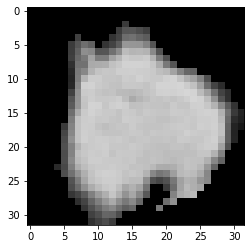

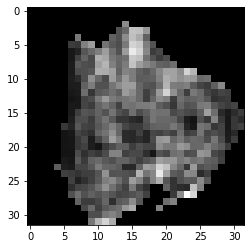

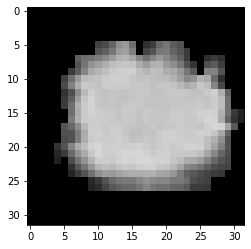

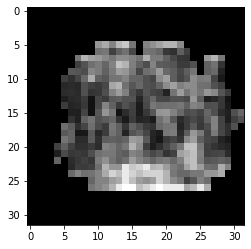

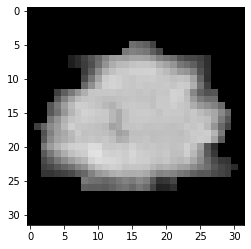

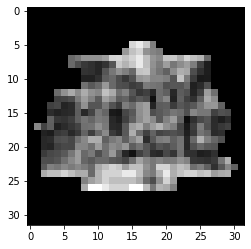

In [4]:
dataset = "HOM"
img = np.load(data_folder + f"/multi_view2/{dataset}/0001.npy")
print(img.shape)
for subimg in img:
    for i in range(len(subimg)):
        imshow(np.squeeze(subimg[i]))